In [4]:
from model import ImageClassifier
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader
from functools import reduce
from operator import __or__
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import copy

In [5]:
input_size = 784 
hidden_size = 32
num_classes = 10
num_epochs = 20
batch_size = 64
num_per_class = 1000
learning_rate = 4e-5

100%|█████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 100366482.26it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 80703327.00it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 76958675.75it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 11232623.09it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

tensor(7)


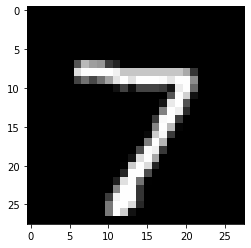

In [6]:
classifier = ImageClassifier(norm_fn = 'softmax', softmax_temp = 1)
classifier.load_data(num_classes, num_per_class, batch_size)
mnist_train = classifier.mnist_train
mnist_test = classifier.mnist_test
target_input = mnist_test.data.float()[0]
target_label = mnist_test.targets[0]
print(target_label)
plt.imshow(target_input.squeeze(), cmap = "gray")
train_indices = classifier.indices
train_size = len(classifier.indices)

In [7]:
torch.save(train_indices, "train_indices")

In [8]:
classifier.test_image(target_input, target_label)
classifier.get_optimizer(learning_rate = learning_rate) 
classifier.init_weights(n_examples = train_size, w_init = (1/train_size), w_decay = 1)

In [9]:
print('=' * 60, '\n', 'Training', '\n', '=' * 60, sep='')
best_dev_acc, final_test_acc = -1., -1.
for epoch in range(num_epochs):
     classifier.pretrain_epoch()
     test_acc = classifier.evaluate()
     print('Pre-train Epoch {}, Test Acc: {:.4f}'.format(epoch, 100. * test_acc))

Training


Test Epoch: 100%|███████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 529.16it/s]


Pre-train Epoch 0, Test Acc: 48.1500


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1118.57it/s]


Pre-train Epoch 1, Test Acc: 59.1300


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1059.75it/s]


Pre-train Epoch 2, Test Acc: 64.2300


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1223.67it/s]


Pre-train Epoch 3, Test Acc: 67.1800


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1020.72it/s]


Pre-train Epoch 4, Test Acc: 69.8800


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1050.68it/s]


Pre-train Epoch 5, Test Acc: 72.0900


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1082.82it/s]


Pre-train Epoch 6, Test Acc: 73.7500


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1011.17it/s]


Pre-train Epoch 7, Test Acc: 75.0200


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1079.83it/s]


Pre-train Epoch 8, Test Acc: 76.0500


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1183.11it/s]


Pre-train Epoch 9, Test Acc: 77.5700


Test Epoch: 100%|███████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 917.44it/s]


Pre-train Epoch 10, Test Acc: 78.9400


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1092.18it/s]


Pre-train Epoch 11, Test Acc: 79.7800


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1022.49it/s]


Pre-train Epoch 12, Test Acc: 80.4400


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1078.57it/s]


Pre-train Epoch 13, Test Acc: 81.5400


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1068.73it/s]


Pre-train Epoch 14, Test Acc: 81.9700


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1076.27it/s]


Pre-train Epoch 15, Test Acc: 82.5600


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1095.70it/s]


Pre-train Epoch 16, Test Acc: 83.0400


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1027.55it/s]


Pre-train Epoch 17, Test Acc: 83.5900


Test Epoch: 100%|███████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 936.58it/s]


Pre-train Epoch 18, Test Acc: 83.9600


Test Epoch: 100%|██████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 1051.52it/s]

Pre-train Epoch 19, Test Acc: 84.3100


In [11]:
print('=' * 60, '\n', 'Training', '\n', '=' * 60, sep='')
for epoch in range(1):
    classifier.train_epoch()

Training


Training Epoch:   0%|                                                                      | 0/157 [00:00<?, ?it/s]/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484810403/work/build/aten/src/ATen/core/TensorBody.h:477.)
  return self._grad
Training Epoch: 100%|████████████████████████████████████████████████████████████| 157/157 [02:06<00:00,  1.24it/s]


In [12]:
ifscore = ((1/train_size) - classifier._weights).detach()
ifscore

tensor([7.2760e-12, 7.2760e-12, 0.0000e+00,  ..., 1.4552e-11, 1.3824e-10,
        5.1659e-10])

In [17]:
torch.max(ifscore)


tensor(1.2951e-09)

In [12]:
torch.sum(ifscore==torch.max(ifscore))

tensor(1)

In [18]:
mnist_train_inputs = mnist_train.data.float()[train_indices]
mnist_train_targets = mnist_train.targets[train_indices]

In [14]:
n = 20
infl, ind = torch.topk(-ifscore, n) # classifier._weights
label = []
for i in range(n):
    label.append(torch.tensor(mnist_train_targets[ind[i]]))
label

/var/folders/_y/h0dptjbj5d94l_5zw2wf_zpm0000gn/T/ipykernel_26097/3608012295.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label.append(torch.tensor(mnist_train_targets[ind[i]]))


[tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(9),
 tensor(7),
 tensor(7),
 tensor(9),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(9),
 tensor(7)]

/var/folders/_y/h0dptjbj5d94l_5zw2wf_zpm0000gn/T/ipykernel_26097/2571034244.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(mnist_train_inputs[ind[i]])
/var/folders/_y/h0dptjbj5d94l_5zw2wf_zpm0000gn/T/ipykernel_26097/2571034244.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label.append(torch.tensor(mnist_train_targets[ind[i]]))


[tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(9),
 tensor(7)]

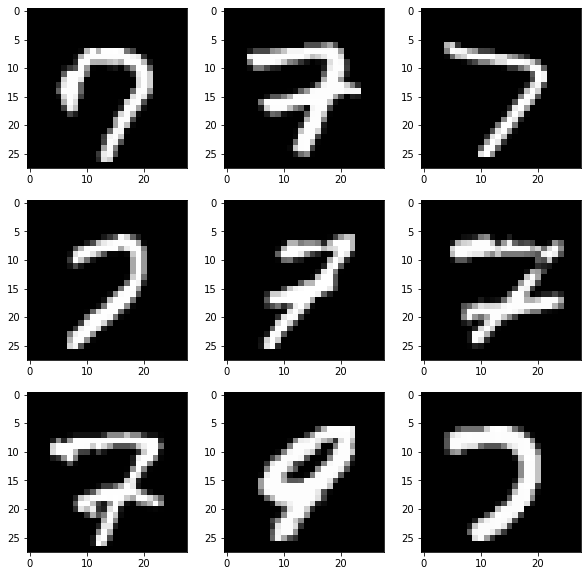

In [15]:
n = 9
weights, ind = torch.topk(-ifscore, n) # classifier._weights
f = plt.figure(figsize=(10,10))
label = []
for i in range(9):
    inputs = torch.tensor(mnist_train_inputs[ind[i]])
    label.append(torch.tensor(mnist_train_targets[ind[i]]))
    f.add_subplot(330 + 1 + i)
    plt.imshow(inputs.squeeze(), cmap = "gray")
label

/var/folders/_y/h0dptjbj5d94l_5zw2wf_zpm0000gn/T/ipykernel_26097/1928680678.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(mnist_train_inputs[ind[i]])
/var/folders/_y/h0dptjbj5d94l_5zw2wf_zpm0000gn/T/ipykernel_26097/1928680678.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label.append(torch.tensor(mnist_train_targets[ind[i]]))


[tensor(2),
 tensor(1),
 tensor(3),
 tensor(8),
 tensor(3),
 tensor(9),
 tensor(3),
 tensor(9),
 tensor(9)]

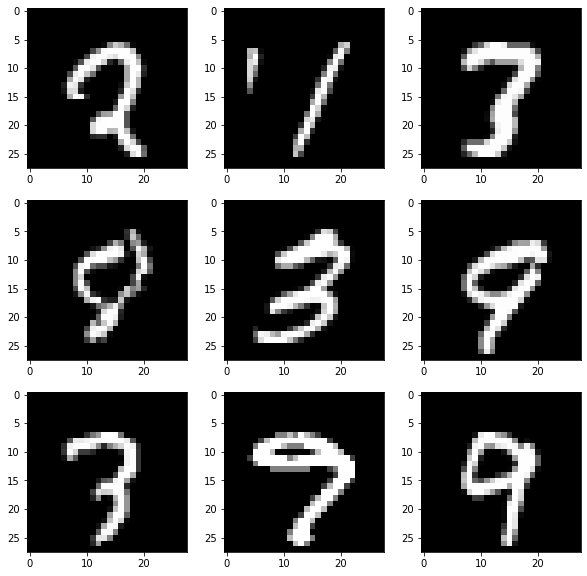

In [18]:
weights, ind = torch.topk(ifscore, 9) # classifier._weights
f = plt.figure(figsize=(10,10))
label = []
for i in range(9):
    inputs = torch.tensor(mnist_train_inputs[ind[i]])
    label.append(torch.tensor(mnist_train_targets[ind[i]]))
    f.add_subplot(330 + 1 + i)
    plt.imshow(inputs.squeeze(), cmap = "gray")
label

In [19]:
torch.save(ifscore, "gradient_if")
torch.save(classifier._model.state_dict(), "model")